# Linear Regression

## Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import datetime as dt
import os
import seaborn as sns
import random 
from scipy.optimize import newton
import itertools

In [120]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import ensemble

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
sns.set_theme()
sns.set_palette("tab20")
sns.set_style("darkgrid", rc = {"grid.color": "white"})
c10 = sns.color_palette("tab10").as_hex()[:]
c20 = sns.color_palette("tab20").as_hex()[:]

In [124]:
pd.set_option('display.max_columns', None)

In [125]:
os.chdir('/Users/maris/Documents/FE800')

## Import Data

In [126]:
df_characteristics = pd.read_pickle("df_characteristics_full.pkl")
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker
0,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,10-15 Years,16.1041,Goldman Sachs,GS,Financials,XLK
1,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,20+ Years,5.6658,Cvs Health,CVS,Health Care,XLF
2,DEUTSCHE TELEKOM INTERNATIONAL FIN,25156PAC7,2030-06-15,6.6110,8.75,0.21,3500000000,Communications,Germany,2000-07-06,2000-07-06,Baa1,BBB+,BBB+,5-7 Years,23.3507,Deutsche Telekom International,DTEGY,Communications,XLY
3,BRITISH TELECOMMUNICATIONS PLC,111021AE1,2030-12-15,7.1123,9.63,0.16,2800000000,Communications,United Kingdom,2000-12-12,2000-12-12,Baa2,BBB,BBB,7-10 Years,22.9151,British Telecommunications,BTGOF,Communications,XLY
4,BANK OF AMERICA CORP,06051GHD4,2028-12-20,5.1260,3.42,0.15,5437485000,Banking,United States,2017-12-20,2018-05-22,A3,BBB+,None,5-7 Years,5.4630,Bank Of America,BAC,Financials,XLK


In [127]:
df_daily = pd.read_pickle("df_daily_full.pkl")
df_daily.head()

cusip,38141GFD1,126650CZ1,25156PAC7,111021AE1,06051GHD4,126650CX6,35177PAL1,377372AE7,126650CY4,046353AD0,852060AT9,037833BX7,172967KA8,913017BT5,38141GWZ3,717081CY7,023135BC9,822582AD4,36186CBY8,437076AS1,126650CN8,617482V92,539439AQ2,92826CAF9,87938WAC7,404280BT5,031162CF5,38141GGM0,161175BA1,983024AN0,46625HRY8,46625HHF0,00287YAM1,023135BJ4,172967EW7,17275RAF9,233835AQ0,61744YAP3,404280BK4,46647PAF3,002824BH2,38141GWV2,949746RF0,06738EAW5,172967LD1,20030NBH3,50077LAB2,037833AL4,92857WAQ3,852060AD4,61744YAK4,17275RAD4,92343VDY7,00287YAS8,38141GWL4,822582BF8,46647PAL0,21685WCJ4,879385AD4,06051GGF0,95000U2A0,00206RCP5,30231GAW2,59562VAM9,375558BD4,035240AL4,035240AN0,172967LP4,91913YAL4,68389XBJ3,46647PAR7,46647PAM8,8935268Z9,172967LS8,456837AH6,161175BL7,06051GGA1,68389XAM7,161175BN3,136385AL5,911312AJ5,68389XBN4,780097BG5,92343VCK8,06738EBD6,037833DB3,50077LAM8,023135AQ9,46625HJB7,172967KU4,055451AV0,031162BZ2,06738EAU9,761713BB1,713448DY1,824348AW6,87938WAU7,037833BA7,94974BGQ7,92857WBD1,375558AX1,244199BF1,94974BGK0,00287YAR0,91324PCR1,902613AY4,65339KAT7,94974BGU8,50076QAE6,92976GAJ0,037833CD0,404280AH2,89352HAD1,931142CB7,904764AH0,037833BH2,023135BM7,718546AH7,617446HD4,20825CAQ7,718172AC3,59023VAA8,075887BW8,149123CB5,56585AAF9,94974BFP0,96949LAD7,06051GHG7,87264AAV7,666807BN1,89352HAW9,38141GWB6,00287YAW9,16412XAG0,822582BQ4,539439AR0,494550AW6,59022CAJ2,79466LAF1,437076BH4,925524AH3,71644EAJ1,057224AZ0,26884LAF6,478160BV5,35671DBC8,89417EAD1,47233JBH0,49456BAP6,594918BS2,05565QDN5,931142EC3,88732JAN8,035242AN6,38141GCU6,28368EAE6,68389XAV7,03523TBT4,037833CR9,94974BGT1,548661DP9,260543CG6,375558BA0,06051GFC8,88732JAJ7,458140BG4,88732JAU2,00206RCQ3,03523TBF4,594918BC7,747525AV5,61746BEG7,925524AX8,11134LAR0,375558BK8,46625HJM3,46625HHV5,06050TJZ6,606822AR5,46625HLL2,136385AX9,747525AU7,961214DK6,61746BEF9,05723KAE0,48126BAA1,74432QAQ8,375558AS2,025816BF5,61747YDY8,172967LW9,161175AZ7,084670BK3,94974BGL8,94974BGE4,428236BR3,747525AK9,91159HHR4,60687YAR0,96950FAF1,92343VEA8,594918BT0,46625HNJ5,20030NCE9,22822VAH4,172967KR1,86562MAR1,260543BJ1,68389XBQ7,666807BP6,404280AG4,05964HAJ4,02209SAR4,61761JZN2,35177PAX5,867229AE6,49456BAH4,58933YAT2,370334CG7,60871RAD2,208251AE8,22822VAK7,05964HAB1,406216AY7,606822AV6,377372AN7,38148LAF3,58013MFA7,316773CH1,06051GEN5,36962GXZ2,06051GGC7,931142EE9,842587CX3,46647PAA4,20030NCC3,023135BF2,20030NAC5,25179MAL7,06051GGL7,68389XBF1,06051GGR4,785592AS5,816851AP4,046353AG3,037833DG2,92343VCX0,58013MEF7,585055BT2,478160AN4,539830BL2,822582AN2,91913YAE0,46647PAK2,911312BM7,539830BN8,91324PBK7,717081DK6,46625HJZ4,59156RAJ7,94973VBB2,548661DN4,651639AP1,92343VDR2,037833AT7,404280AM1,25179MAN3,91159HHS2,37045VAN0,58933YAJ4,03027XAP5,084664BL4,767201AL0,06849UAD7,26441CAT2,55336VAM2,478160CF9,931142CM3,907818EY0,00206RBH4,38143VAA7,04686JAA9,013716AU9,86722TAB8,29379VBC6,149123BS9,46625HRX0,64110LAT3,55336VAN0,037833CH1,11271LAC6,29379VBQ5,373334JW2,406216BK6,459200HF1,036752AD5,983024AG5,92976GAG6,88732JAY4,717081DE0,00774MAB1,68389XAE5,58013MEC4,842400GG2,55336VAR1,20030NCA7,55336VAK6,38148YAA6,893526DJ9,46647PAN6,42809HAD9,38141GVS0,05964HAF2,478160CK8,64110LAS5,36962G3P7,036752AB9,539830BB4,06051GGG8,37045VAF7,406216AW1,172967BL4,46647PAJ5,548661DQ7,60687YAM1,68389XBP9,00817YAF5,59156RAM0,341099CL1,11134LAH2,91324PDL3,902494BC6,035240AG5,42824CAY5,86765BAV1,785592AU0,404119BV0,031162CD0,50076QAR7,606822AN4,037833DK3,171232AQ4,594918CA0,437076AV4,961214DW0,278642AF0,38141EC31,20030NBU4,92553PAP7,87612EBA3,565849AE6,037833CX6,00206RDJ8,717081ED1,172967FX4,594918BL7,822582AY8,68389XAH8,66989HAN8,92343VDC5,452308AR0,35671DBJ3,20030NCH2,68389XAW5,882508BD5,12189LAA9,91324PCD2,87938WAW3,29273RBF5,59156RBD9,20030NBQ3,25470DAR0,718546AL8,822582BE1,718172AU3,585055BU9,68389XBG9,031162CQ1,14149YBJ6,075887BX6,742718EV7,12527GAF0,20030NBZ3,92343VCQ5,575718AA9,035240AP5,12189LAS0,693475AT2,53944YAD5,37045XBT2,06738EAJ4,14040HBW4,256746AH1,341081FQ5,172967HS3,29379VAW3,14040HBN4,404280AJ8,828807DE4,1364

In [128]:
df_daily.shape

(1257, 753)

In [129]:
df_daily_returns = pd.read_pickle("df_daily_returns_full.pkl")
df_daily_returns.head()

cusip,38141GFD1,126650CZ1,25156PAC7,111021AE1,06051GHD4,126650CX6,35177PAL1,377372AE7,126650CY4,046353AD0,852060AT9,037833BX7,172967KA8,913017BT5,38141GWZ3,717081CY7,023135BC9,822582AD4,36186CBY8,437076AS1,126650CN8,617482V92,539439AQ2,92826CAF9,87938WAC7,404280BT5,031162CF5,38141GGM0,161175BA1,983024AN0,46625HRY8,46625HHF0,00287YAM1,023135BJ4,172967EW7,17275RAF9,233835AQ0,61744YAP3,404280BK4,46647PAF3,002824BH2,38141GWV2,949746RF0,06738EAW5,172967LD1,20030NBH3,50077LAB2,037833AL4,92857WAQ3,852060AD4,61744YAK4,17275RAD4,92343VDY7,00287YAS8,38141GWL4,822582BF8,46647PAL0,21685WCJ4,879385AD4,06051GGF0,95000U2A0,00206RCP5,30231GAW2,59562VAM9,375558BD4,035240AL4,035240AN0,172967LP4,91913YAL4,68389XBJ3,46647PAR7,46647PAM8,8935268Z9,172967LS8,456837AH6,161175BL7,06051GGA1,68389XAM7,161175BN3,136385AL5,911312AJ5,68389XBN4,780097BG5,92343VCK8,06738EBD6,037833DB3,50077LAM8,023135AQ9,46625HJB7,172967KU4,055451AV0,031162BZ2,06738EAU9,761713BB1,713448DY1,824348AW6,87938WAU7,037833BA7,94974BGQ7,92857WBD1,375558AX1,244199BF1,94974BGK0,00287YAR0,91324PCR1,902613AY4,65339KAT7,94974BGU8,50076QAE6,92976GAJ0,037833CD0,404280AH2,89352HAD1,931142CB7,904764AH0,037833BH2,023135BM7,718546AH7,617446HD4,20825CAQ7,718172AC3,59023VAA8,075887BW8,149123CB5,56585AAF9,94974BFP0,96949LAD7,06051GHG7,87264AAV7,666807BN1,89352HAW9,38141GWB6,00287YAW9,16412XAG0,822582BQ4,539439AR0,494550AW6,59022CAJ2,79466LAF1,437076BH4,925524AH3,71644EAJ1,057224AZ0,26884LAF6,478160BV5,35671DBC8,89417EAD1,47233JBH0,49456BAP6,594918BS2,05565QDN5,931142EC3,88732JAN8,035242AN6,38141GCU6,28368EAE6,68389XAV7,03523TBT4,037833CR9,94974BGT1,548661DP9,260543CG6,375558BA0,06051GFC8,88732JAJ7,458140BG4,88732JAU2,00206RCQ3,03523TBF4,594918BC7,747525AV5,61746BEG7,925524AX8,11134LAR0,375558BK8,46625HJM3,46625HHV5,06050TJZ6,606822AR5,46625HLL2,136385AX9,747525AU7,961214DK6,61746BEF9,05723KAE0,48126BAA1,74432QAQ8,375558AS2,025816BF5,61747YDY8,172967LW9,161175AZ7,084670BK3,94974BGL8,94974BGE4,428236BR3,747525AK9,91159HHR4,60687YAR0,96950FAF1,92343VEA8,594918BT0,46625HNJ5,20030NCE9,22822VAH4,172967KR1,86562MAR1,260543BJ1,68389XBQ7,666807BP6,404280AG4,05964HAJ4,02209SAR4,61761JZN2,35177PAX5,867229AE6,49456BAH4,58933YAT2,370334CG7,60871RAD2,208251AE8,22822VAK7,05964HAB1,406216AY7,606822AV6,377372AN7,38148LAF3,58013MFA7,316773CH1,06051GEN5,36962GXZ2,06051GGC7,931142EE9,842587CX3,46647PAA4,20030NCC3,023135BF2,20030NAC5,25179MAL7,06051GGL7,68389XBF1,06051GGR4,785592AS5,816851AP4,046353AG3,037833DG2,92343VCX0,58013MEF7,585055BT2,478160AN4,539830BL2,822582AN2,91913YAE0,46647PAK2,911312BM7,539830BN8,91324PBK7,717081DK6,46625HJZ4,59156RAJ7,94973VBB2,548661DN4,651639AP1,92343VDR2,037833AT7,404280AM1,25179MAN3,91159HHS2,37045VAN0,58933YAJ4,03027XAP5,084664BL4,767201AL0,06849UAD7,26441CAT2,55336VAM2,478160CF9,931142CM3,907818EY0,00206RBH4,38143VAA7,04686JAA9,013716AU9,86722TAB8,29379VBC6,149123BS9,46625HRX0,64110LAT3,55336VAN0,037833CH1,11271LAC6,29379VBQ5,373334JW2,406216BK6,459200HF1,036752AD5,983024AG5,92976GAG6,88732JAY4,717081DE0,00774MAB1,68389XAE5,58013MEC4,842400GG2,55336VAR1,20030NCA7,55336VAK6,38148YAA6,893526DJ9,46647PAN6,42809HAD9,38141GVS0,05964HAF2,478160CK8,64110LAS5,36962G3P7,036752AB9,539830BB4,06051GGG8,37045VAF7,406216AW1,172967BL4,46647PAJ5,548661DQ7,60687YAM1,68389XBP9,00817YAF5,59156RAM0,341099CL1,11134LAH2,91324PDL3,902494BC6,035240AG5,42824CAY5,86765BAV1,785592AU0,404119BV0,031162CD0,50076QAR7,606822AN4,037833DK3,171232AQ4,594918CA0,437076AV4,961214DW0,278642AF0,38141EC31,20030NBU4,92553PAP7,87612EBA3,565849AE6,037833CX6,00206RDJ8,717081ED1,172967FX4,594918BL7,822582AY8,68389XAH8,66989HAN8,92343VDC5,452308AR0,35671DBJ3,20030NCH2,68389XAW5,882508BD5,12189LAA9,91324PCD2,87938WAW3,29273RBF5,59156RBD9,20030NBQ3,25470DAR0,718546AL8,822582BE1,718172AU3,585055BU9,68389XBG9,031162CQ1,14149YBJ6,075887BX6,742718EV7,12527GAF0,20030NBZ3,92343VCQ5,575718AA9,035240AP5,12189LAS0,693475AT2,53944YAD5,37045XBT2,06738EAJ4,14040HBW4,256746AH1,341081FQ5,172967HS3,29379VAW3,14040HBN4,404280AJ8,828807DE4,1364

In [130]:
data = pd.read_pickle("data.pkl")
data.head()

,cusip,trd_datetime,trd_dt,trd_px,volume
0,871829BF3,2018-07-01 23:50:32,2018-07-02,94.111,5000000.0
1,98978VAL7,2018-07-02 01:17:48,2018-07-02,92.248,5000000.0
2,037833DB3,2018-07-02 02:37:16,2018-07-02,95.090,10000.0
3,606822AR5,2018-07-02 02:43:56,2018-07-02,95.448,100000.0
4,172967KA8,2018-07-02 03:35:11,2018-07-02,98.817,110000.0


In [131]:
data = data[data['cusip'].isin(df_daily_returns.columns)]
data.head()

,cusip,trd_datetime,trd_dt,trd_px,volume
0,871829BF3,2018-07-01 23:50:32,2018-07-02,94.111,5000000.0
1,98978VAL7,2018-07-02 01:17:48,2018-07-02,92.248,5000000.0
2,037833DB3,2018-07-02 02:37:16,2018-07-02,95.090,10000.0
3,606822AR5,2018-07-02 02:43:56,2018-07-02,95.448,100000.0
4,172967KA8,2018-07-02 03:35:11,2018-07-02,98.817,110000.0


In [132]:
data.shape

(7651474, 5)

In [133]:
df_bond_factors = pd.read_pickle("df_bond_factors.pkl")
df_bond_factors.head()

,cusip,Illiquidity,Roll,Roll_Intraday
0,00130HCG8,0.005285,0.145399,0.381294
1,00130HCH6,0.150137,0.774951,0.926653
2,00206RBH4,0.287334,1.072070,1.101126
3,00206RBK7,0.222489,0.943375,1.122904
4,00206RCP5,0.360659,1.201097,1.244290


In [134]:
macro_factors = pd.read_pickle("macro_factors.pkl")
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99,271.859985,114.239998
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96,270.899994,114.660004
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95,273.109985,115.019997
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94,275.420013,115.180000
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96,277.899994,115.260002


In [135]:
df_etfs = pd.read_pickle("df_etfs.pkl")
df_etfs.head()

,LQD,SPY,LQD_return,SPY_return
Date,,,,
2018-07-02,114.239998,271.859985,NaN,NaN
2018-07-03,114.660004,270.899994,0.003677,-0.003531
2018-07-05,115.019997,273.109985,0.003140,0.008158
2018-07-06,115.180000,275.420013,0.001391,0.008458
2018-07-09,115.260002,277.899994,0.000695,0.009004


In [136]:
df = pd.read_pickle("factor_df.pkl")
df.head()

Price     Volume  Trades    Return       Age  \
cusip     trd_dt                                                      
00206RBH4 2018-07-02  86.132  2643000.0    13.0  0.000000  5.041096   
          2018-07-03  86.821    49000.0     7.0  0.007999  5.043836   
          2018-07-05  86.730   951000.0    24.0 -0.001048  5.049315   
          2018-07-06  88.675   678000.0    11.0  0.022426  5.052055   
          2018-07-09  89.397  2900000.0     7.0  0.008142  5.060274   

                            TTM  Stock_Return  Stock_Volume  ETF_Return  \
cusip     trd_dt                                                          
00206RBH4 2018-07-02  24.471233      0.000000    50002449.0    0.000000   
          2018-07-03  24.468493      0.015523    44857650.0   -0.005025   
          2018-07-05  24.463014     -0.003363    46895286.0    0.004959   
          2018-07-06  24.460274      0.002454    54541518.0    0.007858   
          2018-07-09  24.452055      0.004123    57539848.0    0.011967   

                            PV       YTM   Duration      DV01   Convexity  
cusip     trd_dt                                                           
00206RBH4 2018-07-02       NaN  0.054010  16.324665 -1.406076  339.273017  
          2018-07-03  0.004849  0.053445  16.343155 -1.418929  339.790490  
          2018-07-05  0.001749  0.053541  16.344714 -1.417577  339.812463  
          2018-07-06  0.001668  0.051959  16.349071 -1.449754  339.925850  
          2018-07-09 -0.002931  0.051410  16.326755 -1.459563  339.254704

# Exploratory Data Analysis

## LQD Bond Features

In [137]:
df_characteristics = df_characteristics.reset_index().drop(["index"], axis = 1)
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker
0,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,10-15 Years,16.1041,Goldman Sachs,GS,Financials,XLK
1,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,20+ Years,5.6658,Cvs Health,CVS,Health Care,XLF
2,DEUTSCHE TELEKOM INTERNATIONAL FIN,25156PAC7,2030-06-15,6.6110,8.75,0.21,3500000000,Communications,Germany,2000-07-06,2000-07-06,Baa1,BBB+,BBB+,5-7 Years,23.3507,Deutsche Telekom International,DTEGY,Communications,XLY
3,BRITISH TELECOMMUNICATIONS PLC,111021AE1,2030-12-15,7.1123,9.63,0.16,2800000000,Communications,United Kingdom,2000-12-12,2000-12-12,Baa2,BBB,BBB,7-10 Years,22.9151,British Telecommunications,BTGOF,Communications,XLY
4,BANK OF AMERICA CORP,06051GHD4,2028-12-20,5.1260,3.42,0.15,5437485000,Banking,United States,2017-12-20,2018-05-22,A3,BBB+,None,5-7 Years,5.4630,Bank Of America,BAC,Financials,XLK


In [138]:
df_characteristics.shape

(753, 20)

### Sector/Location

In [139]:
Sector = df_characteristics.groupby("Sector").count()[["Cusip"]]
Sector['Label'] = Sector.index.map(lambda x: x if Sector.loc[x]["Cusip"] > 25 else "")
Sector = Sector.sort_values("Cusip", ascending = False)
Sector['Color'] = c20[:11]
Sector.head()

,Cusip,Label,Color
Sector,,,
Financials,185,Financials,#1f77b4
Energy,100,Energy,#aec7e8
Health Care,94,Health Care,#ff7f0e
Consumer Discretionary,77,Consumer Discretionary,#ffbb78
Technology,73,Technology,#2ca02c


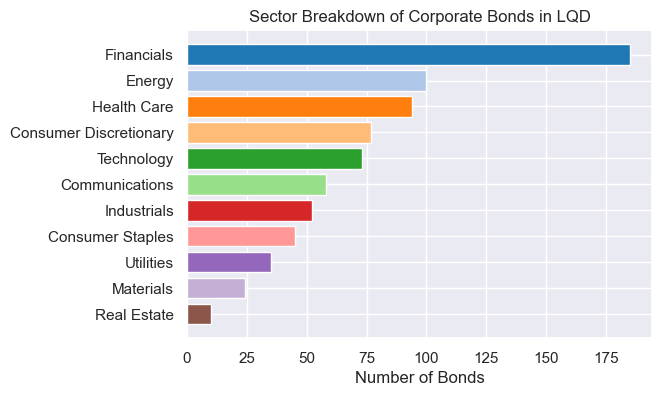

In [140]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(Sector.index, Sector["Cusip"], color = Sector["Color"])
plt.xlabel('Number of Bonds')
plt.title('Sector Breakdown of Corporate Bonds in LQD')
ax.invert_yaxis()
plt.show()

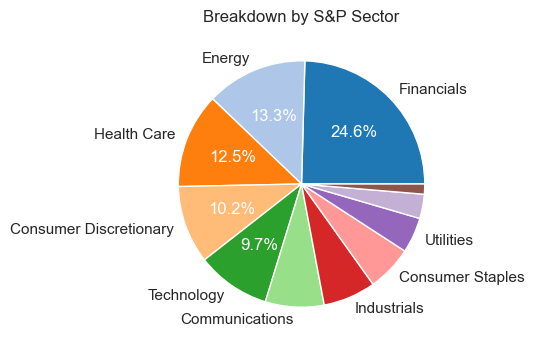

In [141]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(Sector["Cusip"], labels = Sector["Label"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 8 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by S&P Sector')
plt.show()

In [142]:
Industry = df_characteristics.groupby("Industry").count()[["Cusip"]]
Industry['Label'] = Industry.index.map(lambda x: x if Industry.loc[x]["Cusip"] > 25 else "")
Industry = Industry.sort_values("Cusip", ascending = False)
Industry['Color'] = c20[:18]
Industry.head()

,Cusip,Label,Color
Industry,,,
Banking,150,Banking,#1f77b4
Consumer Non-Cyclical,117,Consumer Non-Cyclical,#aec7e8
Energy,97,Energy,#ff7f0e
Communications,86,Communications,#ffbb78
Technology,69,Technology,#2ca02c


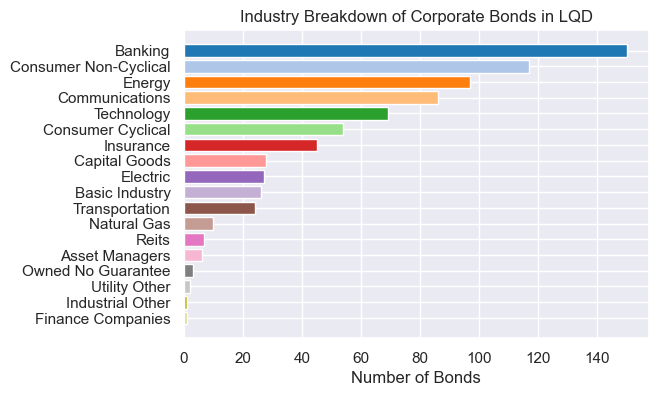

In [143]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(Industry.index, Industry["Cusip"], color = Industry["Color"])
plt.xlabel('Number of Bonds')
plt.title('Industry Breakdown of Corporate Bonds in LQD')
ax.invert_yaxis()
plt.show()

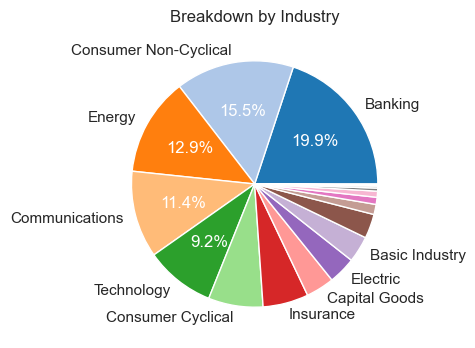

In [144]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(Industry["Cusip"], labels = Industry["Label"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 8 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Industry')
plt.show()

In [145]:
location = df_characteristics.groupby("Location").count()[["Cusip"]]
location['Label'] = location.index.map(lambda x: x if location.loc[x]["Cusip"] > 25 else "")
location = location.sort_values("Cusip", ascending = False)
location['Color'] = c20[:13]
location.head()

,Cusip,Label,Color
Location,,,
United States,627,United States,#1f77b4
United Kingdom,32,United Kingdom,#aec7e8
Canada,30,Canada,#ff7f0e
Netherlands,14,,#ffbb78
Japan,12,,#2ca02c


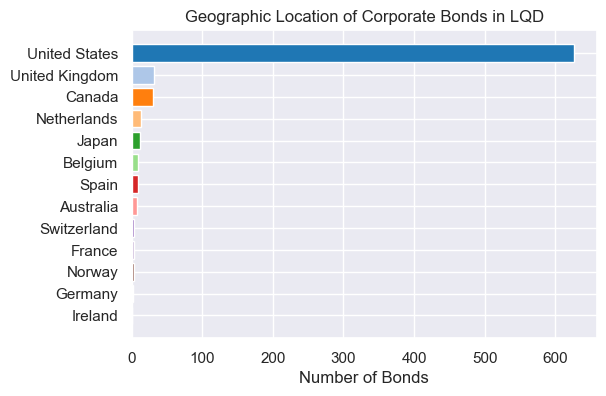

In [146]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(location.index, location["Cusip"], color = location["Color"])
plt.xlabel('Number of Bonds')
ax.invert_yaxis()
plt.title('Geographic Location of Corporate Bonds in LQD')
plt.show()

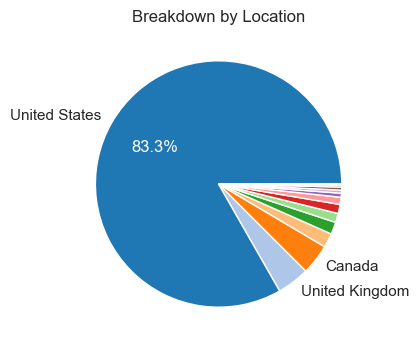

In [147]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(location["Cusip"], labels = location["Label"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Location')
plt.show()

### Time to Maturity

In [148]:
TTM_Range = df_characteristics.groupby("TTM_Range").count()[["Cusip"]]
TTM_Range['Label'] = TTM_Range.index.map(lambda x: x if TTM_Range.loc[x]["Cusip"] > 25 else "")
TTM_Range['Color'] = c20[:7]
TTM_Range.head()

,Cusip,Label,Color
TTM_Range,,,
2-3 Years,25,,#1f77b4
3-5 Years,190,3-5 Years,#aec7e8
5-7 Years,22,,#ff7f0e
7-10 Years,17,,#ffbb78
10-15 Years,112,10-15 Years,#2ca02c


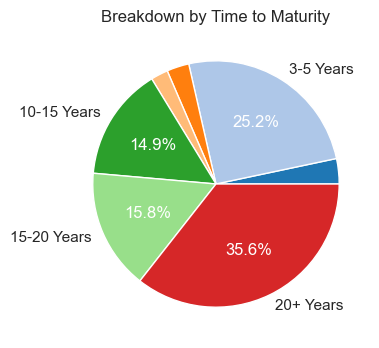

In [149]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(TTM_Range["Cusip"], labels = TTM_Range["Label"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Time to Maturity')
plt.show()

### Effective Date

In [150]:
df_characteristics[df_characteristics["Effective_Date"] < pd.Timestamp("2018-07-01")].shape

(753, 20)

In [151]:
df_characteristics["TFI_Range"] = pd.cut(df_characteristics["TFI"], 
                                           [0, 1, 3, 5, 7, 10, 15, 20, 100],
                                          labels = ["0-1 Years", "1-3 Years", "3-5 Years", "5-7 Years", "7-10 Years", 
                                                    "10-15 Years", "15-20 Years", "20+ Years"])

In [152]:
TFI_Range = df_characteristics.groupby("TFI_Range").count()[["Cusip"]]
TFI_Range['Label'] = TFI_Range.index.map(lambda x: x if TFI_Range.loc[x]["Cusip"] > 25 else "")
TFI_Range['Color'] = c20[:8]
TFI_Range.head()

,Cusip,Label,Color
TFI_Range,,,
0-1 Years,0,,#1f77b4
1-3 Years,0,,#aec7e8
3-5 Years,0,,#ff7f0e
5-7 Years,335,5-7 Years,#ffbb78
7-10 Years,218,7-10 Years,#2ca02c


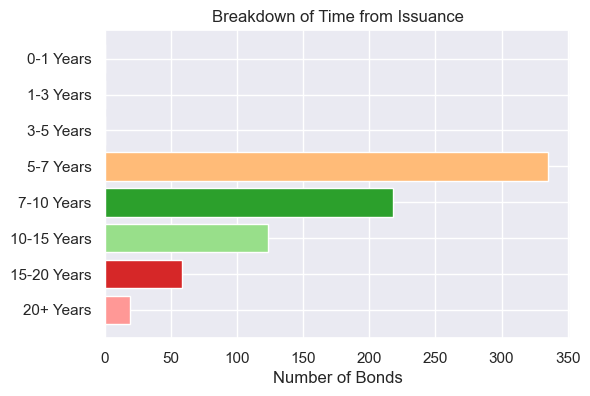

In [153]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(TFI_Range.index, TFI_Range["Cusip"], color = TFI_Range["Color"])
plt.xlabel('Number of Bonds')
plt.title('Breakdown of Time from Issuance')
ax.invert_yaxis()
plt.show()

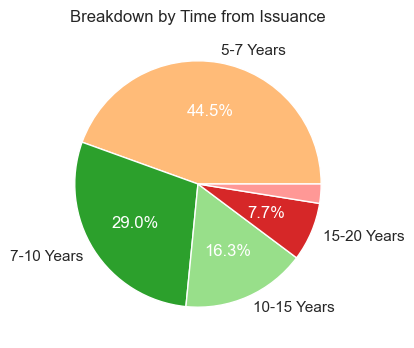

In [154]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(TFI_Range["Cusip"], labels = TFI_Range["Label"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Time from Issuance')
plt.show()

### Bond Rating

In [155]:
bond_ratings = pd.DataFrame(columns = ["S&P", "Moody's", "Fitch", "Interpretation"])
bond_ratings["S&P"] = ["AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+", "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-", "CCC+", "CCC", "None"]
bond_ratings["Moody's"] = ["Aaa", "Aa1", "Aa2", "Aa3", "A1", "A2", "A3", "Baa1", "Baa2", "Baa3", "Ba1", "Ba2", "Ba3", "B1", "B2", "B3", "Caa1", "Caa2", "None"]
bond_ratings["Fitch"] = ["AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+", "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-", "CCC+", "CCC", "None"]
bond_ratings["Interpretation"] = ["Prime", "High Investment Grade", "High Investment Grade", "High Investment Grade", 
                                  "Medium Investment Grade", "Medium Investment Grade", "Medium Investment Grade", "Low Investment Grade",
                                  "Low Investment Grade", "Low Investment Grade", "Non-Investment Grade", "Non-Investment Grade",
                                  "Non-Investment Grade", "Highly Speculative", "Highly Speculative", "Highly Speculative", 
                                  "Extremely Speculative", "Extremely Speculative", "No Rating"]
bond_ratings.head()

,S&P,Moody's,Fitch,Interpretation
0,AAA,Aaa,AAA,Prime
1,AA+,Aa1,AA+,High Investment Grade
2,AA,Aa2,AA,High Investment Grade
3,AA-,Aa3,AA-,High Investment Grade
4,A+,A1,A+,Medium Investment Grade


In [156]:
color_mapping = {
    'Prime': c20[2],
    'High Investment Grade': c20[3],
    'Medium Investment Grade': c20[0],
    'Low Investment Grade': c20[1],
    'Non-Investment Grade': c20[6],
    'Highly Speculative': c20[7],
    'No Rating': c10[7],
}

In [157]:
SP_dict = dict(zip(bond_ratings["S&P"], bond_ratings.index))
Moody_dict = dict(zip(bond_ratings["Moody's"], bond_ratings.index))
Fitch_dict = dict(zip(bond_ratings["Fitch"], bond_ratings.index))

In [158]:
def apply_order(x, rating):
    try:
        if rating == "Moody":
            return Moody_dict[x]
        elif rating == "S&P":
            return SP_dict[x]
        elif rating == "Fitch":
            return Fitch_dict[x]
    except:
        return "fail"

In [159]:
moody_ratings = df_characteristics.groupby("Moody_Rating").count()[["Cusip"]]
moody_ratings["Order"] = moody_ratings.index.map(lambda x: apply_order(x, "Moody"))
moody_ratings["Interpretation"] = moody_ratings.index.map(lambda x: bond_ratings[bond_ratings["Moody's"] == x]["Interpretation"].item())
moody_ratings = moody_ratings.sort_values("Order")
moody_ratings['Color'] = moody_ratings["Interpretation"].apply(lambda x: color_mapping[x])
moody_ratings['Label'] = moody_ratings.index.map(lambda x: x if moody_ratings.loc[x]["Cusip"] > 50 else "")
moody_ratings.head()

,Cusip,Order,Interpretation,Color,Label
Moody_Rating,,,,,
Aaa,19,0,Prime,#ff7f0e,
Aa2,16,2,High Investment Grade,#ffbb78,
Aa3,20,3,High Investment Grade,#ffbb78,
A1,128,4,Medium Investment Grade,#1f77b4,A1
A2,101,5,Medium Investment Grade,#1f77b4,A2


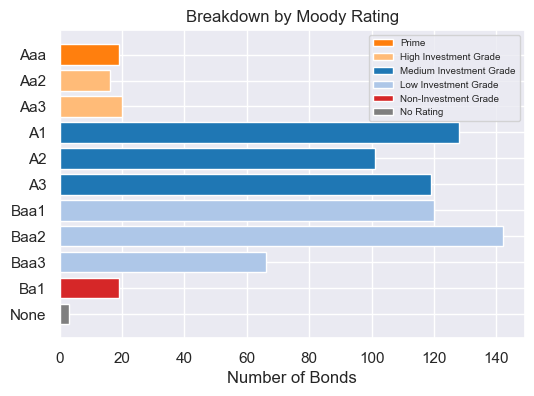

In [160]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(moody_ratings.index, moody_ratings["Cusip"], color=moody_ratings["Color"], label = moody_ratings["Interpretation"])
plt.xlabel('Number of Bonds')
plt.title('Breakdown by Moody Rating')
ax.invert_yaxis()
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, loc = "upper right", fontsize = 7)
plt.show()

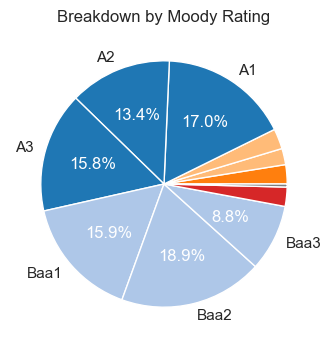

In [161]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(moody_ratings["Cusip"], labels = moody_ratings["Label"], 
                                  colors = moody_ratings["Color"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Moody Rating')
plt.show()

In [162]:
SP_ratings = df_characteristics.groupby("S&P_Rating").count()[["Cusip"]]
SP_ratings["Order"] = SP_ratings.index.map(lambda x: apply_order(x, "S&P"))
SP_ratings["Interpretation"] = SP_ratings.index.map(lambda x: bond_ratings[bond_ratings["S&P"] == x]["Interpretation"].item())
SP_ratings['Color'] = SP_ratings["Interpretation"].apply(lambda x: color_mapping[x])
SP_ratings['Label'] = SP_ratings.index.map(lambda x: x if SP_ratings.loc[x]["Cusip"] > 50 else "")
SP_ratings = SP_ratings.sort_values("Order")
SP_ratings.head()

,Cusip,Order,Interpretation,Color,Label
S&P_Rating,,,,,
AAA,9,0,Prime,#ff7f0e,
AA+,12,1,High Investment Grade,#ffbb78,
AA,14,2,High Investment Grade,#ffbb78,
AA-,28,3,High Investment Grade,#ffbb78,
A+,64,4,Medium Investment Grade,#1f77b4,A+


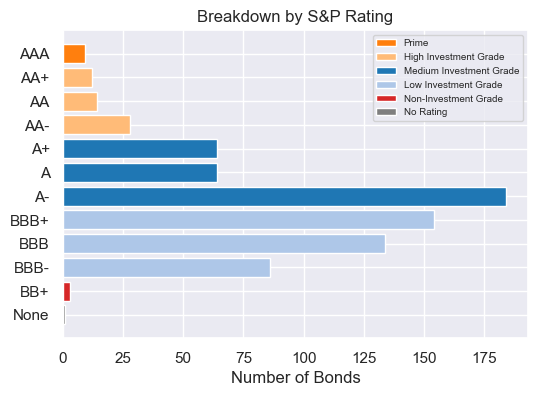

In [163]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(SP_ratings.index, SP_ratings["Cusip"], color=SP_ratings["Color"], label = SP_ratings["Interpretation"])
plt.xlabel('Number of Bonds')
plt.title('Breakdown by S&P Rating')
ax.invert_yaxis()
handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, loc = "upper right", fontsize = 7)
plt.show()

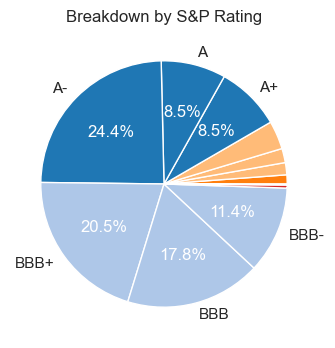

In [164]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(SP_ratings["Cusip"], labels = SP_ratings["Label"], 
                                  colors = SP_ratings["Color"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by S&P Rating')
plt.show()

In [165]:
Fitch_ratings = df_characteristics.groupby("Fitch_Rating").count()[["Cusip"]]
Fitch_ratings["Order"] = Fitch_ratings.index.map(lambda x: apply_order(x, "S&P"))
Fitch_ratings["Interpretation"] = Fitch_ratings.index.map(lambda x: bond_ratings[bond_ratings["Fitch"] == x]["Interpretation"].item())
Fitch_ratings = Fitch_ratings.sort_values("Order")
Fitch_ratings['Color'] = Fitch_ratings["Interpretation"].apply(lambda x: color_mapping[x])
Fitch_ratings['Label'] = Fitch_ratings.index.map(lambda x: x if Fitch_ratings.loc[x]["Cusip"] > 50 else "")
Fitch_ratings.head()

,Cusip,Order,Interpretation,Color,Label
Fitch_Rating,,,,,
AA,4,2,High Investment Grade,#ffbb78,
AA-,52,3,High Investment Grade,#ffbb78,AA-
A+,31,4,Medium Investment Grade,#1f77b4,
A,107,5,Medium Investment Grade,#1f77b4,A
A-,109,6,Medium Investment Grade,#1f77b4,A-


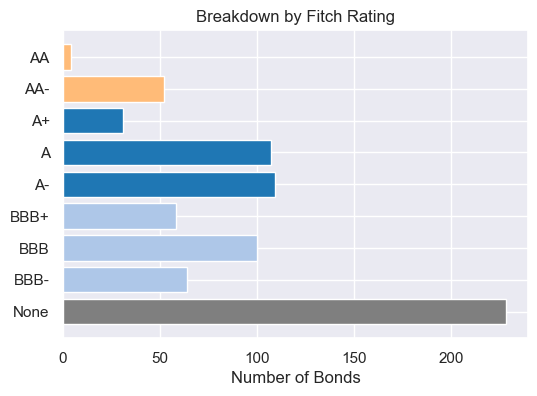

In [166]:
fig, ax = plt.subplots(figsize = [6,4])
plt.barh(Fitch_ratings.index, Fitch_ratings["Cusip"],
         color=[color_mapping[desc] for desc in Fitch_ratings['Interpretation']])
plt.xlabel('Number of Bonds')
plt.title('Breakdown by Fitch Rating')
ax.invert_yaxis()
plt.show()

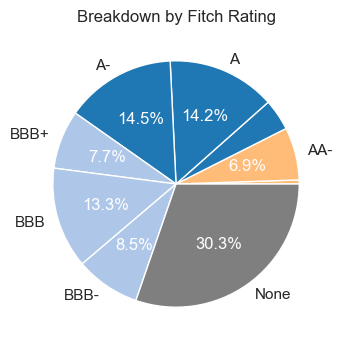

In [167]:
fig, ax = plt.subplots(figsize = [6,4])
wedges, texts, autotexts = ax.pie(Fitch_ratings["Cusip"], labels = Fitch_ratings["Label"], 
                                  colors = Fitch_ratings["Color"], 
                                  autopct=lambda p: format(p, '.1f')+"%" if p > 5 else None)
for autotext in autotexts:
    autotext.set_color("white")
plt.title('Breakdown by Fitch Rating')
plt.show()

## Bond Returns

### Portfolio Returns

In [168]:
initial_value = 100_000

In [169]:
equal_portfolio = pd.DataFrame(np.sum(df_daily.bfill()/df_daily.bfill().iloc[0] * initial_value, axis = 1))
equal_portfolio.columns = ["Equally Weighted"]
equal_portfolio.head()

,Equally Weighted
trd_dt,
2018-07-02,7.530000e+07
2018-07-03,7.554464e+07
2018-07-05,7.581263e+07
2018-07-06,7.598765e+07
2018-07-09,7.608766e+07


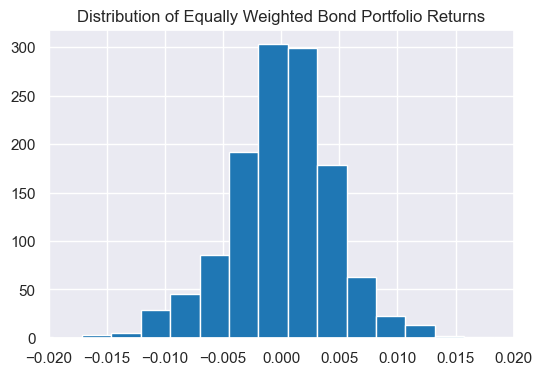

In [170]:
fig, ax = plt.subplots(1, 1, figsize = [6,4])

ax.hist(equal_portfolio.pct_change(), bins = 40)
ax.set_title("Distribution of Equally Weighted Bond Portfolio Returns")
ax.set_xlim(-.02, .02)

plt.show()

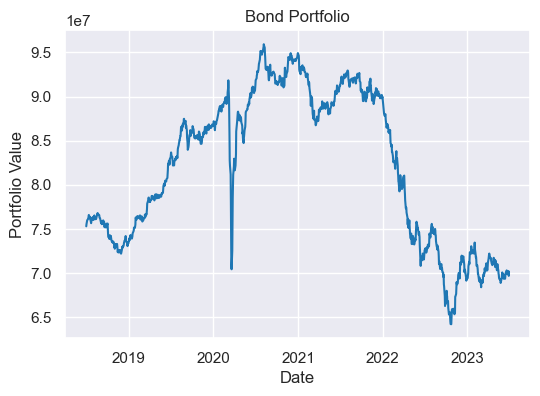

In [171]:
plt.figure(figsize = [6,4])
plt.plot(equal_portfolio, label = "Equally Weighted")
plt.title("Bond Portfolio")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()

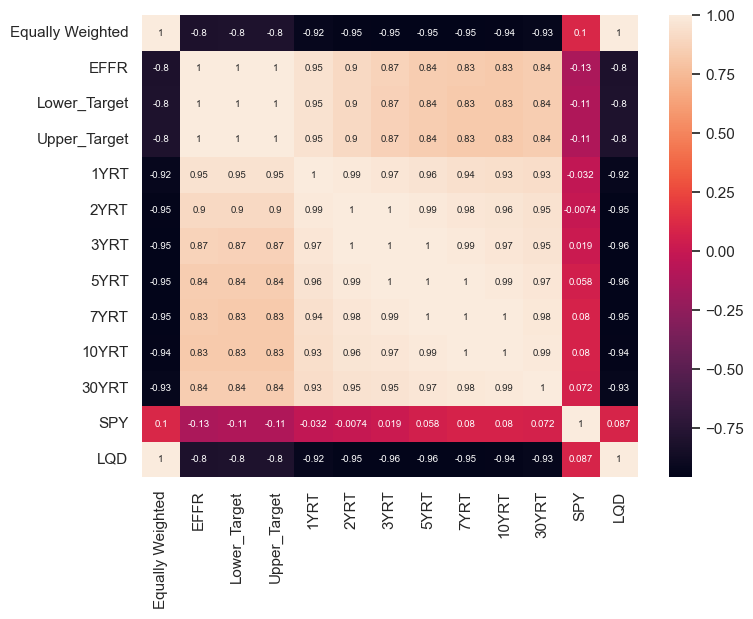

In [172]:
plt.figure(figsize = [8,6])
sns.heatmap(pd.concat([equal_portfolio, macro_factors], axis = 1).corr(), annot = True, annot_kws={"size": 7})
plt.show()

In [173]:
equal_portfolio['Return'] = equal_portfolio["Equally Weighted"].pct_change()
equal_portfolio["Month End"] = equal_portfolio.index.is_month_end
equal_portfolio.head()

,Equally Weighted,Return,Month End
trd_dt,,,
2018-07-02,7.530000e+07,NaN,False
2018-07-03,7.554464e+07,0.003249,False
2018-07-05,7.581263e+07,0.003547,False
2018-07-06,7.598765e+07,0.002309,False
2018-07-09,7.608766e+07,0.001316,False


# Linear Regression (OLS)

In [295]:
def run_OLS(df, feature, output = "True", price = "True"):

    if price == "True":
        X = df.drop([feature, "Price"], axis = 1)[1:].fillna(0)
    else:
        X = df.drop([feature], axis = 1)[1:].fillna(0)

    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-05-31")]
    X_test = X.loc[pd.Timestamp("2022-06-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-05-31")]
    Y_test = Y.loc[pd.Timestamp("2022-06-01"):]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    X0 = sm.add_constant(X)
    model_output = sm.OLS(Y, X0).fit()

    if output == "True":

        fig, ax = plt.subplots(1, 3, figsize = [18,5])
        fig.autofmt_xdate(rotation=45)
 
        print(model_output.summary())
    
        ax[0].scatter(Y_pred, Y_test - Y_pred)
        ax[0].set_title("Homoskedasticity of Residuals")
        ax[0].set_xlabel("Prediction")
        ax[0].set_ylabel("Residual")
    
        ax[1].scatter(Y_pred, Y_test)
        ax[1].set_title("Predictions vs Actual Values")
        ax[1].set_xlabel("Prediction")
        ax[1].set_ylabel("Actual")
        
        ax[2].scatter(Y_test.index, Y_test - Y_pred)
        ax[2].set_title("Distribution of Residuals")
        ax[2].set_ylabel("Residual")
    
        plt.show()

    else:
        
        r2_train = model.score(X_train, Y_train)
        r2_test = r2_score(Y_test, Y_pred)

        prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-06-01"):]}).ffill()
        prices["Return Pred"] = Y_pred + 1

        pred = []
        for i in range(len(prices)):
            if i == 0:
                pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-05-31")])
            else:
                pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
        prices["Pred"] = pred
        
        mse = mean_squared_error(prices["Test"], prices["Pred"])
        rmse = mean_squared_error(prices["Test"], prices["Pred"], squared=False)
        mae = mean_absolute_error(prices["Test"], prices["Pred"])
        
        return r2_train, r2_test, mse, rmse, mae

## Portfolio Return

In [274]:
portfolio_returns = equal_portfolio[["Equally Weighted"]].pct_change()
portfolio_returns.head()

,Equally Weighted
trd_dt,
2018-07-02,NaN
2018-07-03,0.003249
2018-07-05,0.003547
2018-07-06,0.002309
2018-07-09,0.001316


In [275]:
factor_returns = macro_factors.pct_change()
factor_returns.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,0.0,0.0,0.0,-0.004274,-0.015564,-0.007547,-0.010909,-0.014134,-0.013937,-0.010033,-0.003531,0.003677
2018-07-05,0.0,0.0,0.0,-0.004292,0.007905,0.007605,0.007353,0.003584,0.003534,-0.003378,0.008158,0.003140
2018-07-06,0.0,0.0,0.0,0.008621,-0.007843,-0.003774,-0.010949,-0.007143,-0.007042,-0.003390,0.008458,0.001391
2018-07-09,0.0,0.0,0.0,0.000000,0.015810,0.007576,0.014760,0.014388,0.014184,0.006803,0.009004,0.000695


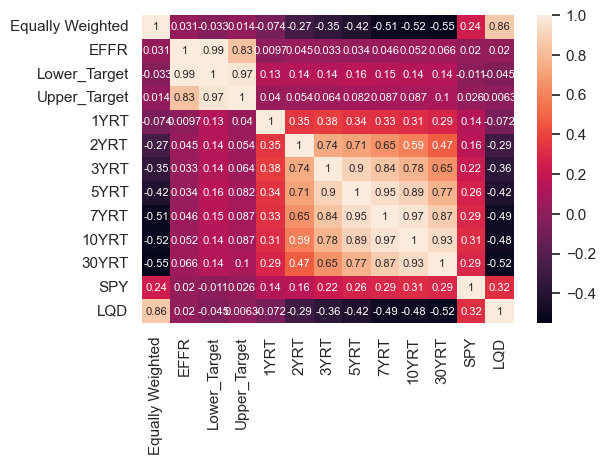

In [276]:
plt.figure(figsize = [6,4])
sns.heatmap(pd.concat([portfolio_returns, factor_returns], axis = 1).corr(), annot = True, annot_kws={"size": 8})
plt.show()

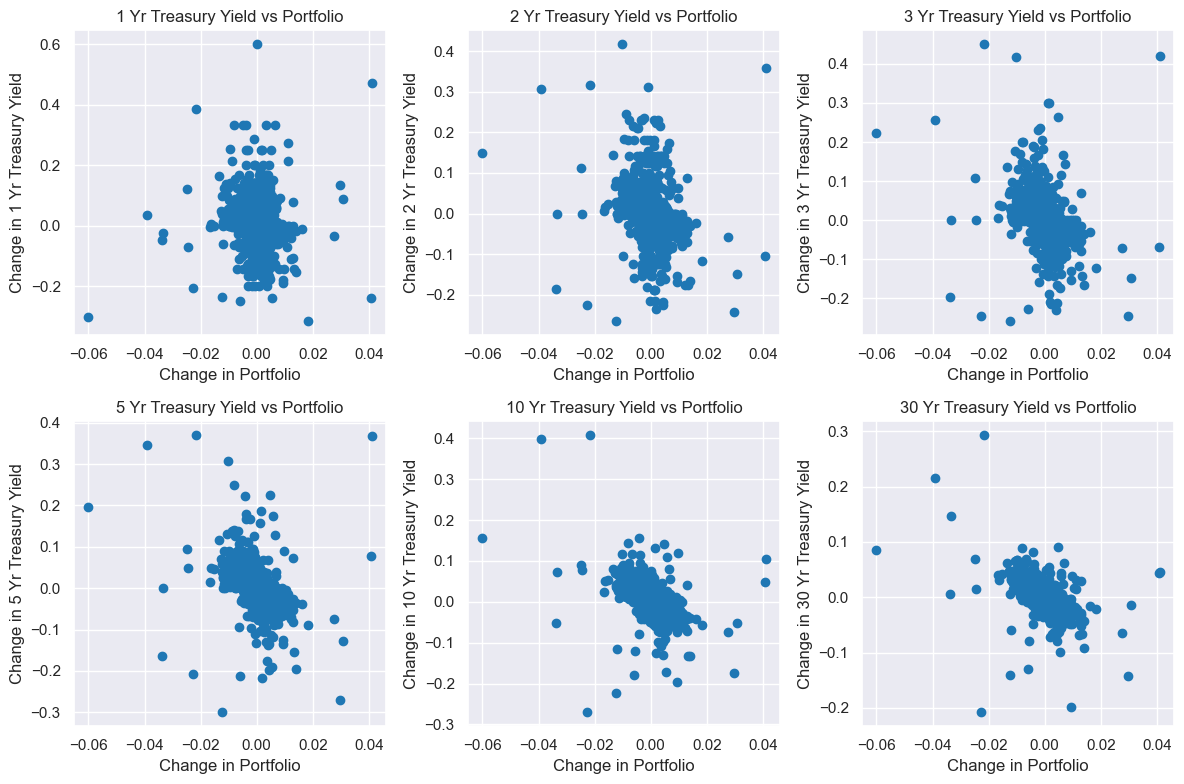

In [277]:
fig, ax = plt.subplots(2, 3, figsize = [12,8])
columns = ["1YRT", "2YRT", "3YRT", "5YRT", "10YRT", "30YRT"]

a = 0
for i in [0,1]:
    for j in [0,1,2]:
        ax[i,j].scatter(pd.concat([portfolio_returns["Equally Weighted"], factor_returns[columns[a]]], axis = 1)["Equally Weighted"],
                   pd.concat([portfolio_returns["Equally Weighted"], factor_returns[columns[a]]], axis = 1)[columns[a]])
        ax[i,j].set_ylabel("Change in " + columns[a][:-3] + " Yr Treasury Yield")
        ax[i,j].set_xlabel("Change in Portfolio")
        ax[i,j].set_title(columns[a][:-3] + " Yr Treasury Yield vs Portfolio")
        a += 1
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Equally Weighted   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     95.36
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           7.71e-99
Time:                        20:47:38   Log-Likelihood:                 4992.7
No. Observations:                1265   AIC:                            -9971.
Df Residuals:                    1258   BIC:                            -9935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.27e-06      0.000      0.063      0.9

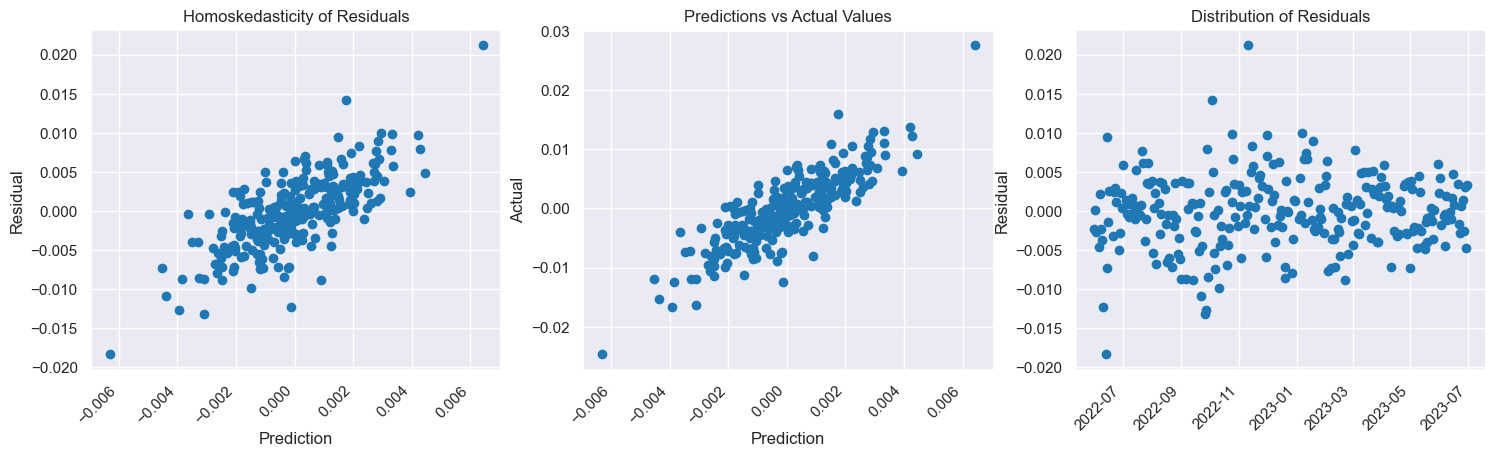

In [279]:
run_OLS(pd.concat([portfolio_returns["Equally Weighted"], factor_returns[["1YRT", "2YRT", "3YRT", "5YRT", "10YRT", "30YRT"]]], axis = 1), 
        "Equally Weighted", price = "False")

                            OLS Regression Results                            
Dep. Variable:       Equally Weighted   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     547.3
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          7.65e-101
Time:                        20:47:49   Log-Likelihood:                 4983.3
No. Observations:                1265   AIC:                            -9963.
Df Residuals:                    1263   BIC:                            -9952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.306e-05      0.000      0.174      0.8

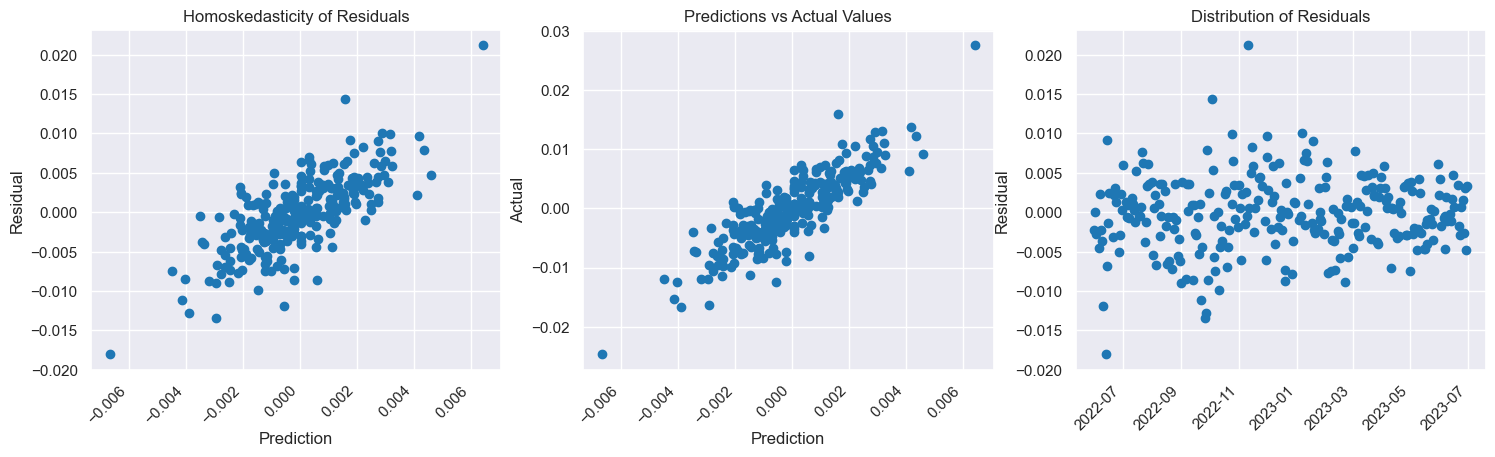

In [280]:
run_OLS(pd.concat([portfolio_returns["Equally Weighted"], factor_returns["30YRT"]], axis = 1), 
        "Equally Weighted", price = "False")

                            OLS Regression Results                            
Dep. Variable:       Equally Weighted   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     3511.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:47:54   Log-Likelihood:                 5560.3
No. Observations:                1257   AIC:                        -1.112e+04
Df Residuals:                    1255   BIC:                        -1.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.556e-05   8.19e-05     -0.312      0.7

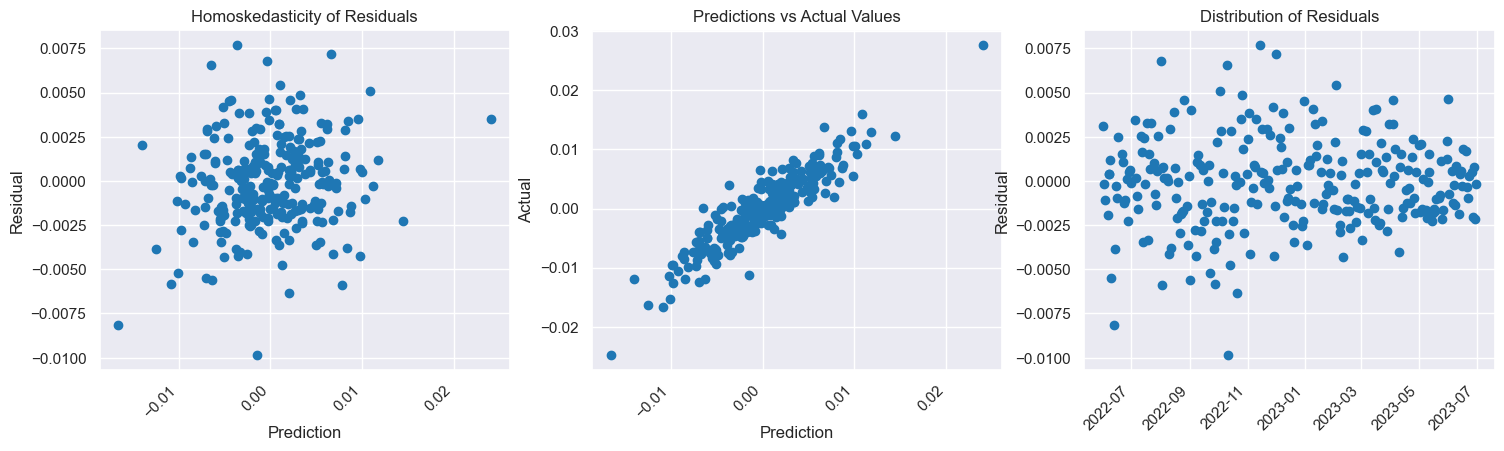

In [281]:
run_OLS(pd.concat([portfolio_returns["Equally Weighted"], df_etfs["LQD_return"]], axis = 1), 
        "Equally Weighted", price = "False")

                            OLS Regression Results                            
Dep. Variable:       Equally Weighted   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1290.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:47:59   Log-Likelihood:                 5643.3
No. Observations:                1265   AIC:                        -1.128e+04
Df Residuals:                    1261   BIC:                        -1.126e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.817e-05   7.88e-05     -0.231      0.8

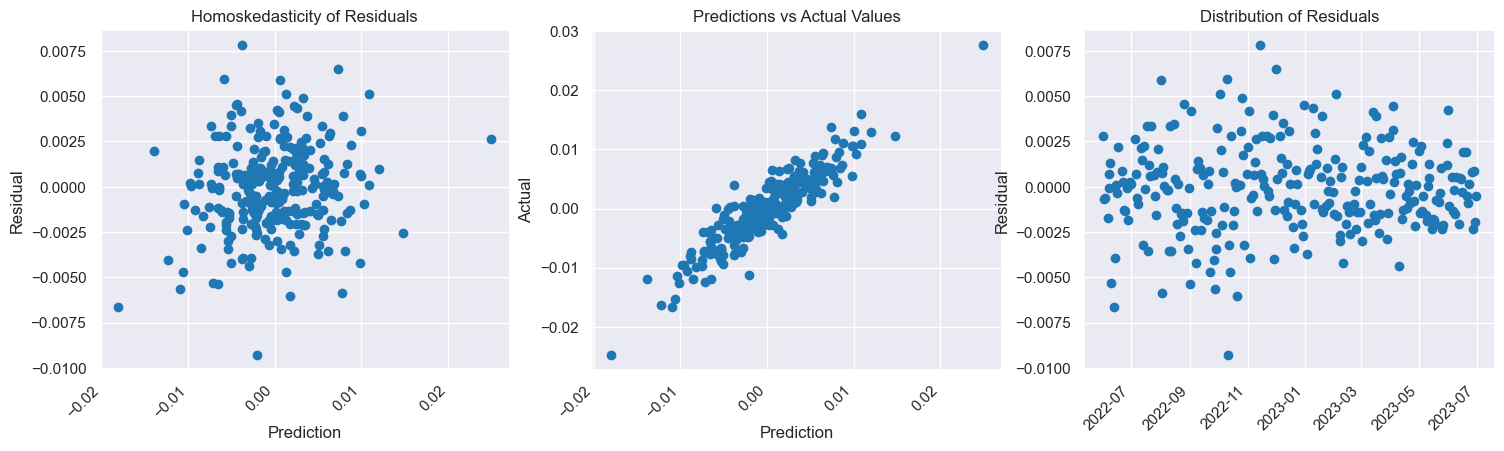

In [282]:
run_OLS(pd.concat([portfolio_returns["Equally Weighted"], factor_returns[["30YRT", "SPY", "LQD"]]], axis = 1), 
        "Equally Weighted", price = "False")

## Bond Returns

In [180]:
df = df.drop(["92976GAJ0", "902613AY4", "64110LAT3", "64110LAS5"])
df["Volume"] = df["Volume"].fillna(0)
df["Trades"] = df["Trades"].fillna(0)
df.head()

Price     Volume  Trades    Return       Age  \
cusip     trd_dt                                                      
00206RBH4 2018-07-02  86.132  2643000.0    13.0  0.000000  5.041096   
          2018-07-03  86.821    49000.0     7.0  0.007999  5.043836   
          2018-07-05  86.730   951000.0    24.0 -0.001048  5.049315   
          2018-07-06  88.675   678000.0    11.0  0.022426  5.052055   
          2018-07-09  89.397  2900000.0     7.0  0.008142  5.060274   

                            TTM  Stock_Return  Stock_Volume  ETF_Return  \
cusip     trd_dt                                                          
00206RBH4 2018-07-02  24.471233      0.000000    50002449.0    0.000000   
          2018-07-03  24.468493      0.015523    44857650.0   -0.005025   
          2018-07-05  24.463014     -0.003363    46895286.0    0.004959   
          2018-07-06  24.460274      0.002454    54541518.0    0.007858   
          2018-07-09  24.452055      0.004123    57539848.0    0.011967   

                            PV       YTM   Duration      DV01   Convexity  
cusip     trd_dt                                                           
00206RBH4 2018-07-02       NaN  0.054010  16.324665 -1.406076  339.273017  
          2018-07-03  0.004849  0.053445  16.343155 -1.418929  339.790490  
          2018-07-05  0.001749  0.053541  16.344714 -1.417577  339.812463  
          2018-07-06  0.001668  0.051959  16.349071 -1.449754  339.925850  
          2018-07-09 -0.002931  0.051410  16.326755 -1.459563  339.254704

In [181]:
scaler = StandardScaler()

In [182]:
scaled_volume, scaled_stock_volume = [], []

for i in df.index.droplevel(1).unique():
    scaled_volume.extend(scaler.fit_transform(df.loc[i][["Volume"]]))
    scaled_stock_volume.extend(scaler.fit_transform(df.loc[i][["Stock_Volume"]]))

scaled_volume =  [item for sublist in scaled_volume for item in sublist]
scaled_stock_volume =  [item for sublist in scaled_stock_volume for item in sublist]

In [183]:
df_scaled = df.copy()
df_scaled["Volume"] = scaled_volume
df_scaled["Stock_Volume"] = scaled_stock_volume
#df_scaled = df_scaled.drop(["Price"], axis = 1)
df_scaled.head()

Price    Volume  Trades    Return       Age        TTM  \
cusip     trd_dt                                                                
00206RBH4 2018-07-02  86.132 -0.169280    13.0  0.000000  5.041096  24.471233   
          2018-07-03  86.821 -0.779797     7.0  0.007999  5.043836  24.468493   
          2018-07-05  86.730 -0.567504    24.0 -0.001048  5.049315  24.463014   
          2018-07-06  88.675 -0.631757    11.0  0.022426  5.052055  24.460274   
          2018-07-09  89.397 -0.108793     7.0  0.008142  5.060274  24.452055   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-02      0.000000      0.043275    0.000000       NaN   
          2018-07-03      0.015523     -0.171355   -0.005025  0.004849   
          2018-07-05     -0.003363     -0.086349    0.004959  0.001749   
          2018-07-06      0.002454      0.232636    0.007858  0.001668   
          2018-07-09      0.004123      0.357721    0.011967 -0.002931   

                           YTM   Duration      DV01   Convexity  
cusip     trd_dt                                                 
00206RBH4 2018-07-02  0.054010  16.324665 -1.406076  339.273017  
          2018-07-03  0.053445  16.343155 -1.418929  339.790490  
          2018-07-05  0.053541  16.344714 -1.417577  339.812463  
          2018-07-06  0.051959  16.349071 -1.449754  339.925850  
          2018-07-09  0.051410  16.326755 -1.459563  339.254704

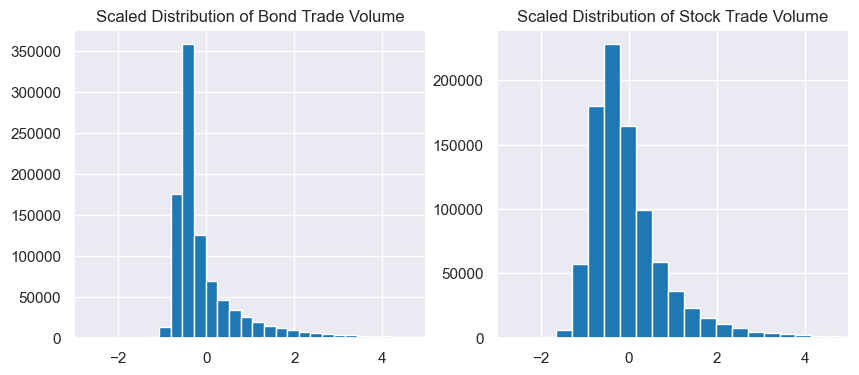

In [184]:
fig, ax = plt.subplots(1, 2, figsize = [10,4])

ax[0].hist(df_scaled['Volume'], bins = 100)
ax[0].set_title("Scaled Distribution of Bond Trade Volume")
ax[0].set_xlim(-3, 5)

ax[1].hist(df_scaled['Stock_Volume'], bins = 100)
ax[1].set_title("Scaled Distribution of Stock Trade Volume")
ax[1].set_xlim(-3, 5)

plt.show()

In [185]:
df_factors = factor_returns.drop(["EFFR", "Lower_Target", "Upper_Target"], axis = 1)
df_factors.head()

,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,-0.004274,-0.015564,-0.007547,-0.010909,-0.014134,-0.013937,-0.010033,-0.003531,0.003677
2018-07-05,-0.004292,0.007905,0.007605,0.007353,0.003584,0.003534,-0.003378,0.008158,0.003140
2018-07-06,0.008621,-0.007843,-0.003774,-0.010949,-0.007143,-0.007042,-0.003390,0.008458,0.001391
2018-07-09,0.000000,0.015810,0.007576,0.014760,0.014388,0.014184,0.006803,0.009004,0.000695


                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.64e-84
Time:                        17:53:54   Log-Likelihood:                 4881.9
No. Observations:                1265   AIC:                            -9720.
Df Residuals:                    1243   BIC:                            -9607.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.002      0.196   

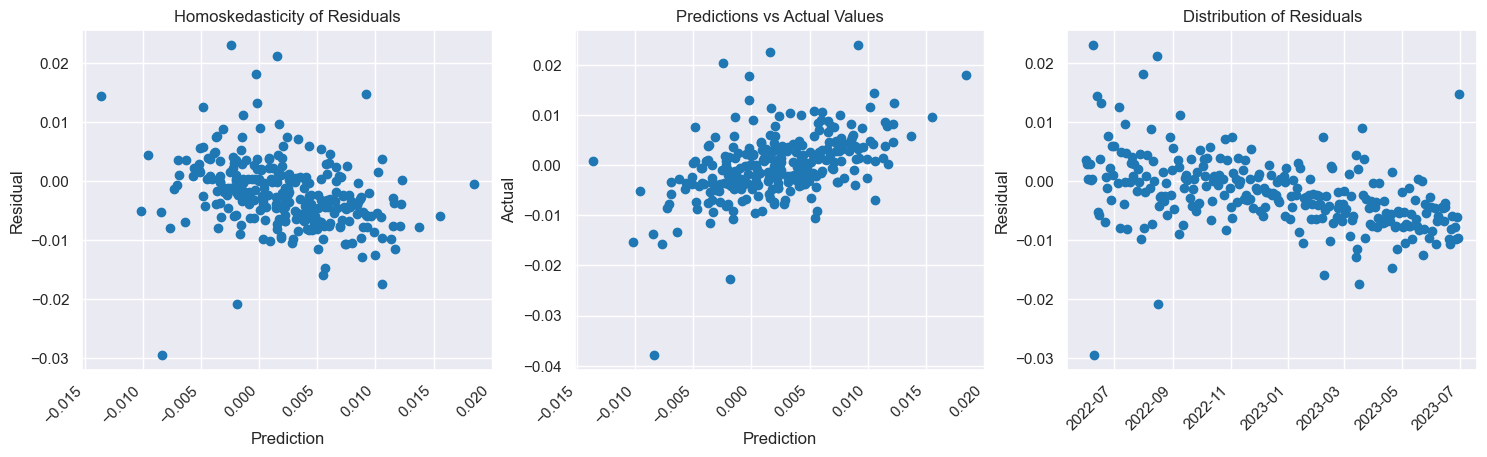

In [186]:
run_OLS(pd.concat([df.loc[random.sample(list(df.index.droplevel(1).unique()), 1)[0]], 
                   df_factors], axis = 1), "Return")

In [284]:
%%time

ols_results = pd.DataFrame(columns = ["Cusip", "R2 Train", "R2 Test", "MSE", "RMSE", "MAE"])
for col in list(df_scaled.index.droplevel(1).unique()):
    outputs = run_OLS(pd.concat([df_scaled.loc[col], df_factors], axis = 1), "Return", output = False)
    ols_results.loc[len(ols_results)] = [col, outputs[0], outputs[1], outputs[2], outputs[3], outputs[4]]

CPU times: user 5min 12s, sys: 7min 29s, total: 12min 41s
Wall time: 1min 9s


In [285]:
ols_results.sort_values("R2 Test")

,Cusip,R2 Train,R2 Test,MSE,RMSE,MAE
636,879385AD4,0.224249,-4.685529,3.330139,1.824867,1.585184
247,26441CAX3,0.076922,-4.565586,1.497406,1.223685,0.560892
618,85771PAQ5,0.097431,-4.362515,5.428779,2.329974,2.071392
53,036752AB9,0.055573,-3.899760,1.092378,1.045169,0.459285
548,717081CY7,0.084057,-3.443669,6.358375,2.521582,2.196643
...,...,...,...,...,...,...
122,084659AF8,0.076816,-0.005825,1.425492,1.193940,0.906580
216,208251AE8,0.119701,-0.002692,3.919518,1.979777,0.760082
669,911312AJ5,0.069980,-0.002192,3.016679,1.736859,0.863195
408,478160CL6,0.064654,-0.000148,0.783395,0.885096,0.669365


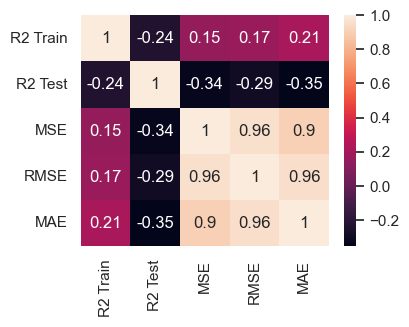

In [286]:
plt.figure(figsize = [4,3])
sns.heatmap(ols_results.drop(["Cusip"], axis = 1).corr(), annot = True)
plt.show()

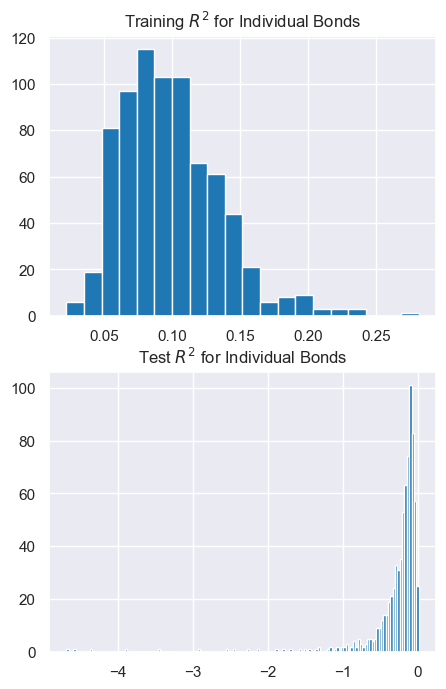

In [288]:
fig, ax = plt.subplots(2, 1, figsize = [5,8])

ax[0].hist(ols_results["R2 Train"], bins = 20)
ax[0].set_title("Training $R^2$ for Individual Bonds")
#ax[0].set_xlim(0, 1)

ax[1].hist(ols_results["R2 Test"], bins = 150)
ax[1].set_title("Test $R^2$ for Individual Bonds")
#ax[1].set_xlim(-2, 1)

plt.show()

In [289]:
len(ols_results[ols_results["R2 Test"] > 0])/len(ols_results)

0.0013351134846461949

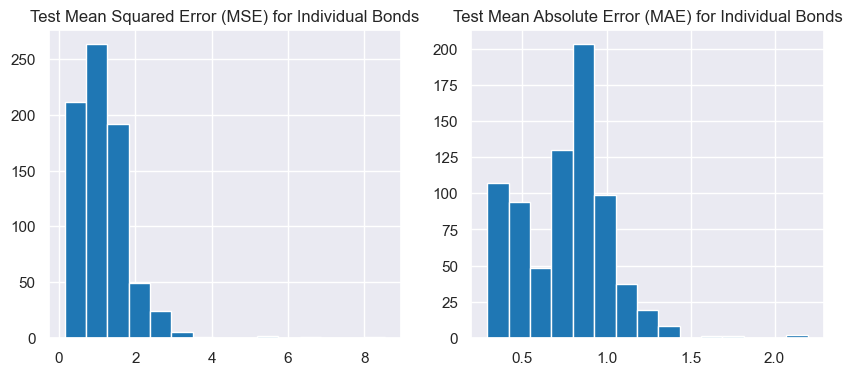

In [290]:
fig, ax = plt.subplots(1, 2, figsize = [10,4])

ax[0].hist(ols_results["MSE"], bins = 15)
ax[0].set_title("Test Mean Squared Error (MSE) for Individual Bonds")

ax[1].hist(ols_results["MAE"], bins = 15)
ax[1].set_title("Test Mean Absolute Error (MAE) for Individual Bonds")

plt.show()

In [294]:
ols_results.drop(["Cusip"], axis = 1).mean(axis = 0)

R2 Train    0.098372
R2 Test    -0.285309
MSE         1.118346
RMSE        1.002276
MAE         0.754262
dtype: float64

# Lasso Regression

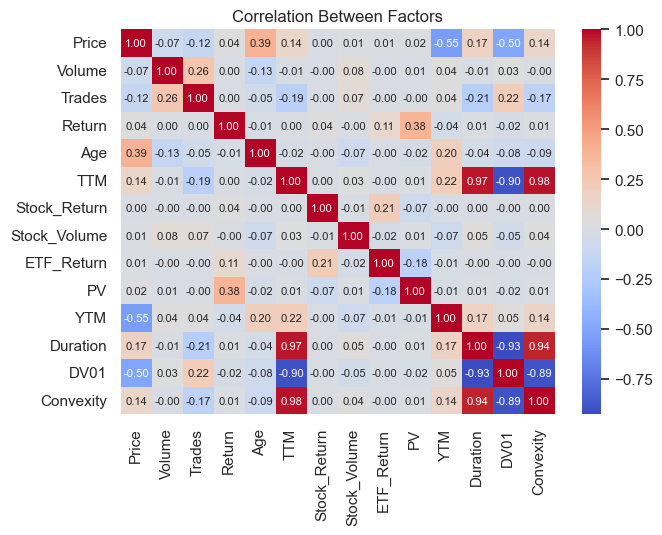

In [210]:
plt.figure(figsize = [7,5])
sns.heatmap(df.corr(), annot = True, annot_kws={"size": 8}, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Between Factors")
plt.show()

In [220]:
X = df_scaled.drop(["Return"], axis = 1).fillna(0)
vif_factors = pd.DataFrame()
vif_factors["Variable"] = X.columns
vif_factors["Variance Inflation"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_factors = vif_factors.sort_values("Variance Inflation", ascending = False)
vif_factors["Color"] = c20[:13]
vif_factors

,Variable,Variance Inflation,Color
4,TTM,231.919372,#1f77b4
10,Duration,180.479153,#aec7e8
11,DV01,128.459604,#ff7f0e
12,Convexity,82.660859,#ffbb78
0,Price,31.994825,#2ca02c
9,YTM,17.478354,#98df8a
3,Age,5.018764,#d62728
2,Trades,1.298299,#ff9896
7,ETF_Return,1.078885,#9467bd
5,Stock_Return,1.043518,#c5b0d5


In [215]:
multicolinear_columns = vif_factors[vif_factors["Variance Inflation"] > 10]["Variable"].to_list()
multicolinear_columns

['Price', 'TTM', 'YTM', 'Duration', 'DV01', 'Convexity']

In [216]:
vif_macro = pd.DataFrame()
vif_macro["Variable"] = df_factors.dropna().columns
vif_macro["Variance Inflation"] = [variance_inflation_factor(df_factors.dropna().values, i) for i in range(df_factors.dropna().shape[1])]
vif_macro

,Variable,Variance Inflation
0,1YRT,1.208202
1,2YRT,2.350589
2,3YRT,6.204051
3,5YRT,17.239184
4,7YRT,33.971265
5,10YRT,33.560545
6,30YRT,10.474054
7,SPY,1.678936
8,LQD,2.194033


In [199]:
df_factors_stacked = pd.DataFrame(columns = df_factors.columns)
df_factors_stacked['1YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["1YRT"], 749)))
df_factors_stacked['2YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["2YRT"], 749)))
df_factors_stacked['3YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["3YRT"], 749)))
df_factors_stacked['5YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["5YRT"], 749)))
df_factors_stacked['7YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["7YRT"], 749)))
df_factors_stacked['10YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["10YRT"], 749)))
df_factors_stacked['30YRT'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["30YRT"], 749)))
df_factors_stacked['SPY'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["SPY"], 749)))
df_factors_stacked['LQD'] = list(itertools.chain.from_iterable(itertools.repeat(df_factors["LQD"], 749)))
df_factors_stacked.head()

,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.004274,-0.015564,-0.007547,-0.010909,-0.014134,-0.013937,-0.010033,-0.003531,0.003677
2,-0.004292,0.007905,0.007605,0.007353,0.003584,0.003534,-0.003378,0.008158,0.003140
3,0.008621,-0.007843,-0.003774,-0.010949,-0.007143,-0.007042,-0.003390,0.008458,0.001391
4,0.000000,0.015810,0.007576,0.014760,0.014388,0.014184,0.006803,0.009004,0.000695


In [200]:
df_factors_stacked.shape

(948234, 9)

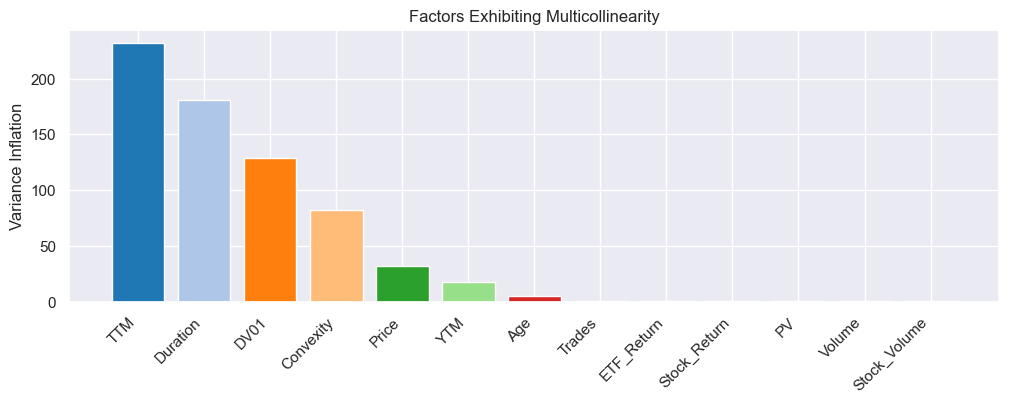

In [222]:
fig, ax = plt.subplots(figsize = [12,4])
fig.autofmt_xdate(rotation=45)
plt.bar(vif_factors.Variable, vif_factors["Variance Inflation"], color = vif_factors["Color"])
plt.ylabel('Variance Inflation')
plt.title('Factors Exhibiting Multicollinearity')
plt.show()

In [224]:
multicolinear_macro_columns = vif_macro[vif_macro["Variance Inflation"] > 10]["Variable"].to_list()
multicolinear_macro_columns

['5YRT', '7YRT', '10YRT', '30YRT']

In [240]:
def run_lasso_regression(df, feature):

    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-05-31")]
    X_test = X.loc[pd.Timestamp("2022-06-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-05-31")]
    Y_test = Y.loc[pd.Timestamp("2022-06-01"):]

    lasso_model = LassoCV(alphas = np.random.randint(0, 1000,100), cv = 10, max_iter = 100000).fit(X_train, Y_train)
    lasso_tuned = Lasso().set_params(alpha = lasso_model.alpha_).fit(X_train, Y_train)
    Y_pred = lasso_tuned.predict(X_test)

    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-06-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-05-31")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    
    mse = mean_squared_error(prices["Test"], prices["Pred"])
    rmse = mean_squared_error(prices["Test"], prices["Pred"], squared=False)
    mae = mean_absolute_error(prices["Test"], prices["Pred"])

    return r2_test, mse, rmse, mae

In [242]:
%%time

lasso_results = pd.DataFrame(columns = ["Cusip", "R2 Test", "MSE", "RMSE", "MAE"])
for col in list(df_scaled.index.droplevel(1).unique()):
    outputs = run_lasso_regression(pd.concat([df_scaled.loc[col], df_factors], axis = 1), "Return")
    lasso_results.loc[len(lasso_results)] = [col, outputs[0], outputs[1], outputs[2], outputs[3]]

CPU times: user 19min 35s, sys: 26min 29s, total: 46min 5s
Wall time: 5min 14s


In [243]:
lasso_results.head()

,Cusip,R2 Test,MSE,RMSE,MAE
0,00206RBH4,-0.001129,1.147302,1.071122,0.807234
1,00206RBK7,-0.001475,0.991125,0.995552,0.743029
2,00206RCP5,-0.002091,0.918839,0.958561,0.733858
3,00206RCQ3,0.210709,0.948135,0.973722,0.728663
4,00206RCU4,-0.001325,2.210542,1.486789,0.813138


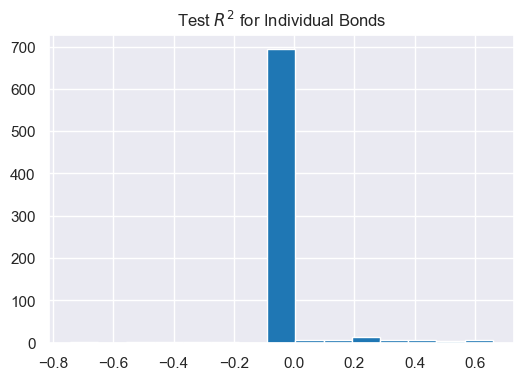

In [245]:
plt.figure(figsize = [6,4])
plt.hist(lasso_results["R2 Test"], bins = 15)
plt.title("Test $R^2$ for Individual Bonds")
plt.show()

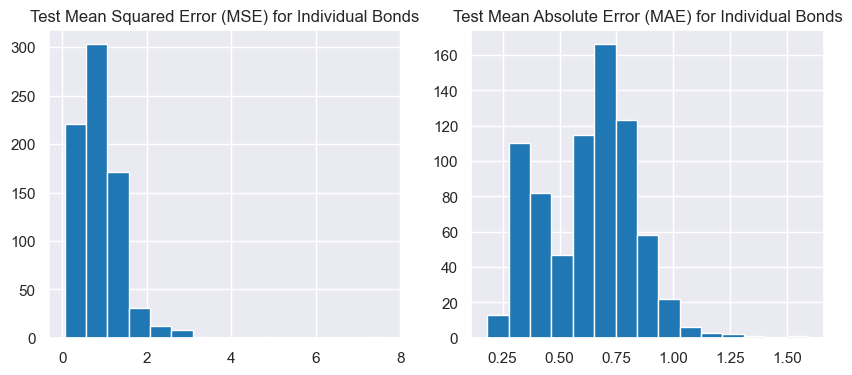

In [246]:
fig, ax = plt.subplots(1, 2, figsize = [10,4])

ax[0].hist(lasso_results["MSE"], bins = 15)
ax[0].set_title("Test Mean Squared Error (MSE) for Individual Bonds")

ax[1].hist(lasso_results["MAE"], bins = 15)
ax[1].set_title("Test Mean Absolute Error (MAE) for Individual Bonds")

plt.show()

# Ridge Regression

In [256]:
def run_ridge_regression(df, feature):
    
    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-05-31")]
    X_test = X.loc[pd.Timestamp("2022-06-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-05-31")]
    Y_test = Y.loc[pd.Timestamp("2022-06-01"):]

    ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=10).fit(X_train, Y_train)
    ridge_tuned = Ridge(alpha=ridge_model.alpha_).fit(X_train, Y_train)
    Y_pred = ridge_tuned.predict(X_test)

    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-06-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-05-31")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    
    mse = mean_squared_error(prices["Test"], prices["Pred"])
    rmse = mean_squared_error(prices["Test"], prices["Pred"], squared=False)
    mae = mean_absolute_error(prices["Test"], prices["Pred"])

    return r2_test, mse, rmse, mae

In [257]:
%%time

ridge_results = pd.DataFrame(columns = ["Cusip", "R2 Test", "MSE", "RMSE", "MAE"])
for col in list(df_scaled.index.droplevel(1).unique()):
    outputs = run_ridge_regression(pd.concat([df_scaled.loc[col], df_factors], axis = 1), "Return")
    ridge_results.loc[len(ridge_results)] = [col, outputs[0], outputs[1], outputs[2], outputs[3]]

CPU times: user 10min 20s, sys: 1min 38s, total: 11min 58s
Wall time: 1min 59s


In [258]:
ridge_results.head()

,Cusip,R2 Test,MSE,RMSE,MAE
0,00206RBH4,0.317216,0.787895,0.887634,0.690218
1,00206RBK7,0.096716,0.890252,0.943532,0.719783
2,00206RCP5,0.357846,0.603430,0.776808,0.554400
3,00206RCQ3,0.224623,0.932049,0.965427,0.717614
4,00206RCU4,-0.250890,2.725014,1.650762,1.128377


In [259]:
ridge_results.sort_values("R2 Test")

,Cusip,R2 Test,MSE,RMSE,MAE
193,172967LS8,-6.009316,1.535581,1.239186,0.457137
732,94974BGL8,-2.534216,1.235668,1.111606,0.894964
588,79466LAF1,-1.905408,0.824960,0.908273,0.385584
197,20030NAF8,-1.692367,1.946069,1.395016,0.695007
47,035240AL4,-1.592869,0.883429,0.939909,0.603615
...,...,...,...,...,...
16,00287YAW9,0.672624,0.330407,0.574811,0.429602
477,594918BS2,0.674290,0.236710,0.486528,0.367627
212,20030NCJ8,0.676158,0.248484,0.498482,0.374592
519,666807BP6,0.680450,0.313952,0.560315,0.428254


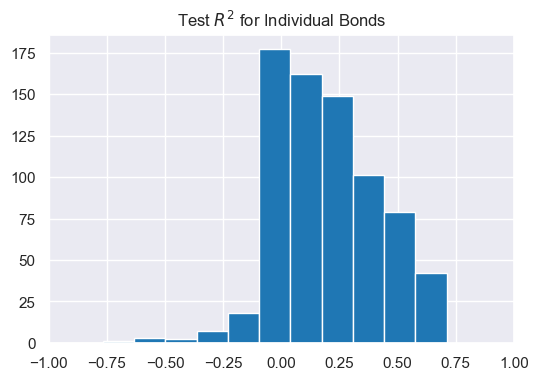

In [260]:
plt.figure(figsize = [6,4])
plt.hist(ridge_results["R2 Test"], bins = 50)
plt.title("Test $R^2$ for Individual Bonds")
plt.xlim(-1, 1)
plt.show()

In [261]:
ridge_results["R2 Test"].mean()

0.17092454669129586

In [262]:
len(ridge_results[ridge_results["R2 Test"] > 0])/len(ridge_results)

0.7730307076101469

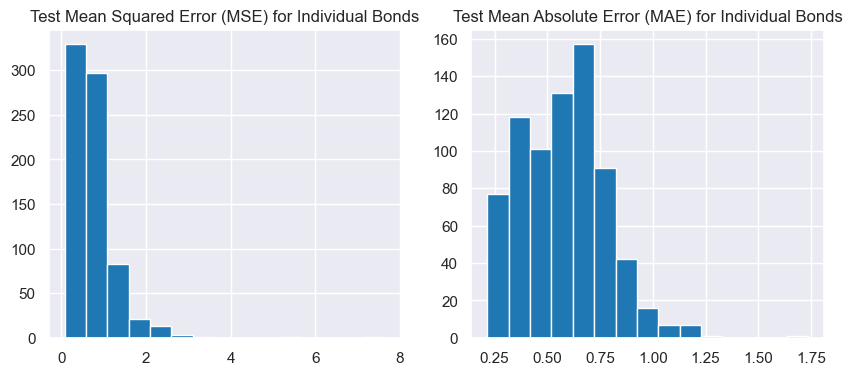

In [263]:
fig, ax = plt.subplots(1, 2, figsize = [10,4])

ax[0].hist(ridge_results["MSE"], bins = 15)
ax[0].set_title("Test Mean Squared Error (MSE) for Individual Bonds")

ax[1].hist(ridge_results["MAE"], bins = 15)
ax[1].set_title("Test Mean Absolute Error (MAE) for Individual Bonds")

plt.show()

# Elastic Net

In [264]:
def run_elastic_net_regression(df, feature):
    
    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-05-31")]
    X_test = X.loc[pd.Timestamp("2022-06-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-05-31")]
    Y_test = Y.loc[pd.Timestamp("2022-06-01"):]

    elastic_net_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10, random_state=0)
    elastic_net_model.fit(X_train, Y_train)
    
    elastic_net_best = ElasticNet(alpha=elastic_net_model.alpha_, l1_ratio=elastic_net_model.l1_ratio_)
    elastic_net_best.fit(X_train, Y_train)

    Y_pred = elastic_net_best.predict(X_test)

    r2_train = elastic_net_best.score(X_train, Y_train)
    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-06-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-05-31")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    
    mse = mean_squared_error(prices["Test"], prices["Pred"])
    rmse = mean_squared_error(prices["Test"], prices["Pred"], squared=False)
    mae = mean_absolute_error(prices["Test"], prices["Pred"])

    return elastic_net_model.alpha_, elastic_net_model.l1_ratio_, r2_train, r2_test, mse, rmse, mae

In [268]:
elastic_columns = ["Cusip", "Alpha", "L1 Ratio", "R2 Train", 'R2 Test', "MSE", "RMSE", "MAE"]

In [271]:
%%time

elastic_results = pd.DataFrame(columns = elastic_columns)
for col in list(df_scaled.index.droplevel(1).unique()):
    outputs = run_elastic_net_regression(pd.concat([df_scaled.loc[col], df_factors], axis = 1), "Return")
    elastic_results.loc[len(elastic_results)] = [col, outputs[0], outputs[1], outputs[2], outputs[3], outputs[4], outputs[5], outputs[6]]

CPU times: user 31min 23s, sys: 1h 6min 1s, total: 1h 37min 24s
Wall time: 10min 40s


In [272]:
elastic_results.head()

,Cusip,Alpha,L1 Ratio,R2 Train,R2 Test,MSE,RMSE,MAE
0,00206RBH4,0.000014,1.0,0.255014,0.194492,0.920297,0.959321,0.749087
1,00206RBK7,0.000017,1.0,0.326932,0.022369,0.958392,0.978975,0.782815
2,00206RCP5,0.000019,1.0,0.197790,0.209977,0.725702,0.851882,0.656924
3,00206RCQ3,0.000032,1.0,0.304671,0.175452,0.984947,0.992445,0.752936
4,00206RCU4,0.000024,1.0,0.203760,-0.142173,2.482950,1.575738,1.052545


# Compare Models

In [273]:
compare_error = pd.DataFrame(columns = ["R2 Test", "MSE", "RMSE", "MAE"])
compare_error.loc["OLS"] = ols_results[["R2 Test", "MSE", "RMSE", "MAE"]].mean()
compare_error.loc["Lasso"] = lasso_results[["R2 Test", "MSE", "RMSE", "MAE"]].mean()
compare_error.loc["Ridge"] = ridge_results[["R2 Test", "MSE", "RMSE", "MAE"]].mean()
compare_error.loc["Elastic Net"] = elastic_results[["R2 Test", "MSE", "RMSE", "MAE"]].mean()
compare_error = compare_error.rename(columns = {"R2 Test": "Test R2"})
compare_error

,Test R2,MSE,RMSE,MAE
OLS,-0.031326,0.828717,0.850693,0.638208
Lasso,0.014030,0.883797,0.891525,0.625240
Ridge,0.170925,0.723773,0.799887,0.578664
Elastic Net,0.153083,0.761164,0.818839,0.590773
